K-Means Clustering

## K-Means Clustering Explained

K-Means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping subgroups or clusters. Here's a breakdown of the key concepts:

1.  **K**: This is the number of clusters you want to create. You need to specify this value beforehand. Choosing the optimal K is a crucial step and often involves techniques like the elbow method or silhouette analysis.

2.  **Centroids**: Each cluster is represented by a centroid, which is essentially the mean of all data points belonging to that cluster. Initially, K centroids are randomly placed within the data space.

3.  **Assignment Step**: In this step, each data point is assigned to the nearest centroid. The distance metric used is typically Euclidean distance, but other metrics can be employed.

4.  **Update Step**: After all data points have been assigned to clusters, the centroids are recalculated. The new centroid for each cluster is the mean of all data points assigned to that cluster.

5.  **Iteration**: Steps 3 and 4 are repeated iteratively. The centroids shift their positions in each iteration as data points are reassigned based on the updated centroid locations.

6.  **Convergence**: The algorithm converges when the centroids no longer move significantly between iterations, or when a maximum number of iterations is reached. At this point, the clusters are considered stable.

7.  **Objective**: The goal of K-Means is to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each data point and its assigned centroid.

In essence, K-Means works by iteratively refining the cluster assignments and centroid positions until a stable configuration is achieved, grouping similar data points together.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("/content/3.01.+Country+clusters.csv")
display(df.head())

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


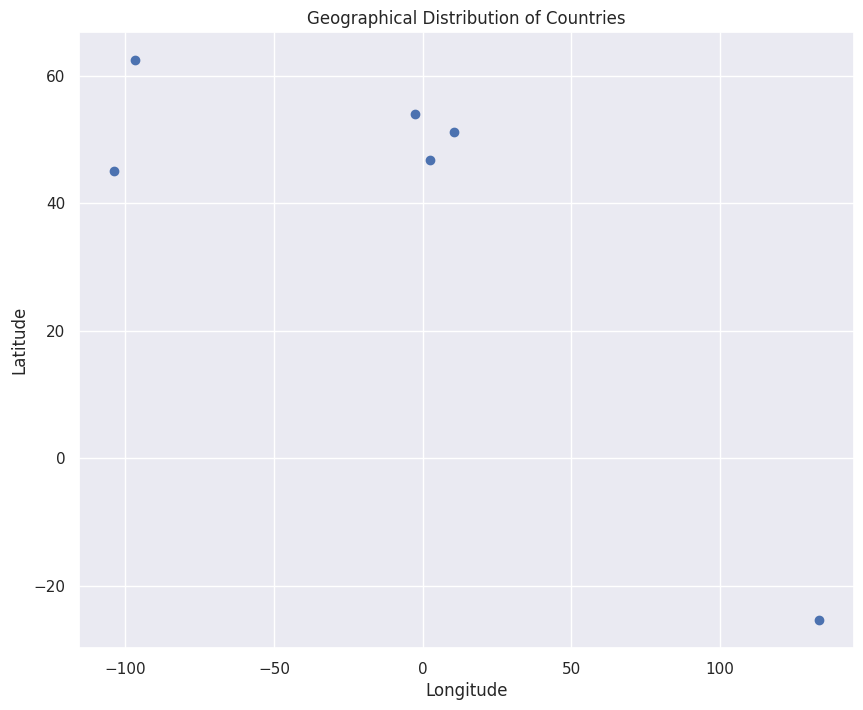

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Countries')
plt.show()

In [5]:
X = df[['Longitude', 'Latitude']]
display(X.head())

,Longitude,Latitude
0,-103.77,44.97
1,-96.80,62.40
2,2.40,46.75
3,-2.53,54.01
4,10.40,51.15


In [7]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init for clarity and to avoid potential warnings
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [8]:
clusters = kmeans.predict(X)
display(clusters)

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [10]:
df['cluster'] = clusters
display(df[['Country', 'cluster']])

,Country,cluster
0,USA,0
1,Canada,0
2,France,0
3,UK,0
4,Germany,0
5,Australia,1


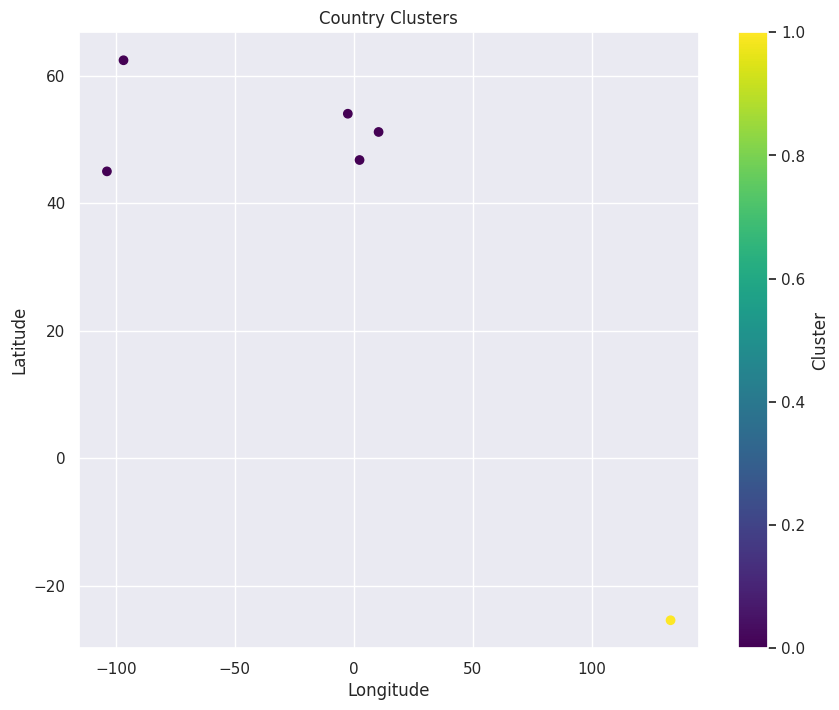

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Country Clusters')
plt.colorbar(label='Cluster')
plt.show()